<a href="https://colab.research.google.com/github/hawaldarruhaan/CAR_PRICE_PREDICTION/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATASETS/CAR DETAILS FROM CAR DEKHO.csv')

In [ ]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [ ]:
print(df.fuel.value_counts())
print(df.seller_type.value_counts())
print(df.transmission.value_counts())
print(df.owner.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64
owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


Encoding Categorical data to numerical (fuel)

In [ ]:
# encoding fuel column
df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)

<ipython-input-11-4349126d616a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}}, inplace=True)


In [ ]:
# encoding seller_type column
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)

<ipython-input-12-70c8b8001d13>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}}, inplace=True)


In [ ]:
# encoding transmission column
df.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)

<ipython-input-13-f407ae20fdbb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'transmission':{'Manual':0,'Automatic':1}}, inplace=True)


In [ ]:
# encoding owner column
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)

<ipython-input-14-6741f5c36143>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}}, inplace=True)


In [ ]:
X = df.drop(['name','selling_price'], axis=1)
Y = df['selling_price']

Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3906, 6) (434, 6)


loading model linear regression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# evaluate
# prediction on training data

training_data_prediction = model.predict(X_train)

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4325630227506242


Visualize actual price and predicted

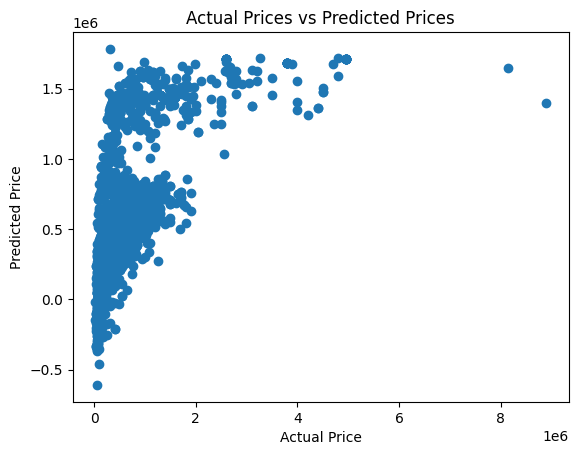

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on test data

test_data_prediction = model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5123159688209236


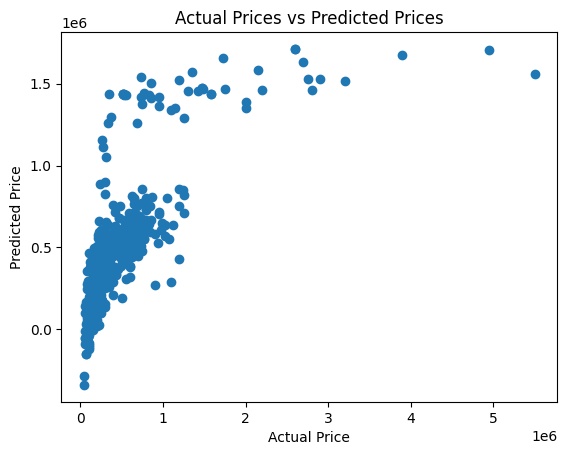

In [ ]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

LASSO REGRESSION

In [ ]:
model = Lasso()


In [ ]:
model.fit(X_train, Y_train)

Lasso()

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
errror_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5123159688209236


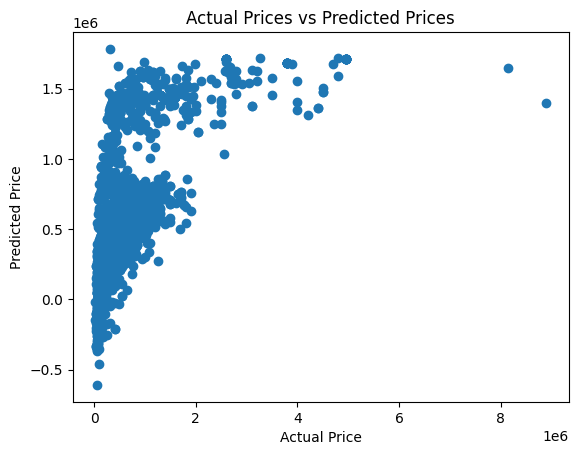

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)

In [ ]:
errror_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.5123159688209236


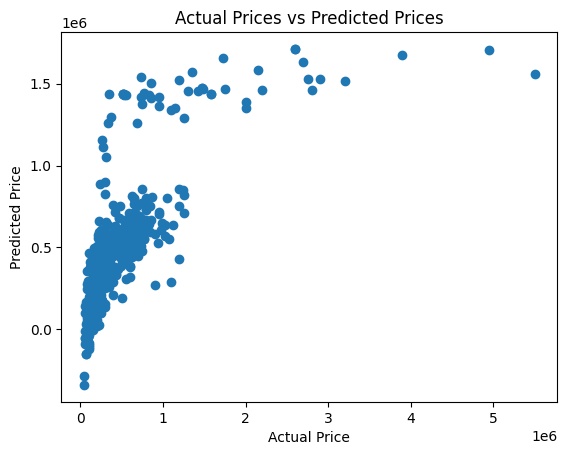

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Prediction SYstem

In [ ]:
# input_data = (2013,70000,1,1,1,0)  # example: Diesel=1, Dealer=1, Automatic=1, First Owner=0
input_data = (2017,150000,0,0,0,0)  # example: year=2017,km=150000,petrol=0, Dealer=0, Manual=0, First Owner=0


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("Predicted Price :",prediction,"Rupees")

# if prediction[0] > 0.5:
#     print('Suggestion: Sell')
# else:
#     print('Suggestion: Not Sell')

# ...............classification model me =1,>1,<1 use karte hai ye regression model hai toh ek threshold value dena better hai

# Optional: Compare to some threshold if needed
threshold = 100000  # 1 lakh
if prediction > threshold:
  print('Sell')
else:
  print('Not Sell')


Predicted Price : [387493.33840527] Rupees
Sell


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename = 'car_price_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model
loader_model = pickle.load(open('car_price_prediction_model.sav', 'rb'))

In [ ]:
# input_data = (2013,70000,1,1,1,0)  # example: Diesel=1, Dealer=1, Automatic=1, First Owner=0
input_data = (2017,150000,0,0,0,0)  # example: year=2017,km=150000,petrol=0, Dealer=0, Manual=0, First Owner=0


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loader_model.predict(input_data_reshaped)

print("Predicted Price :",prediction,"Rupees")

# if prediction[0] > 0.5:
#     print('Suggestion: Sell')
# else:
#     print('Suggestion: Not Sell')

# ...............classification model me =1,>1,<1 use karte hai ye regression model hai toh ek threshold value dena better hai

# Optional: Compare to some threshold if needed
threshold = 100000  # 1 lakh
if prediction > threshold:
  print('Sell')
else:
  print('Not Sell')


Predicted Price : [387493.33840527] Rupees
Sell


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
